In [41]:
"""
main title: ##
sub-title: ###
"""

'\nmain title: ##\nsub-title: ###\n'

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## Proprocessing

### data checking

In [48]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [49]:
# exclude id column

train = train.iloc[:, 1:]
test = test.iloc[:, 1:]

In [73]:
train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [51]:
test.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0


In [52]:
# split x features and y feature

train_x = train.iloc[:, :-1]
train_y = train.ProdTaken

In [53]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1861 non-null   float64
 1   TypeofContact             1945 non-null   object 
 2   CityTier                  1955 non-null   int64  
 3   DurationOfPitch           1853 non-null   float64
 4   Occupation                1955 non-null   object 
 5   Gender                    1955 non-null   object 
 6   NumberOfPersonVisiting    1955 non-null   int64  
 7   NumberOfFollowups         1942 non-null   float64
 8   ProductPitched            1955 non-null   object 
 9   PreferredPropertyStar     1945 non-null   float64
 10  MaritalStatus             1955 non-null   object 
 11  NumberOfTrips             1898 non-null   float64
 12  Passport                  1955 non-null   int64  
 13  PitchSatisfactionScore    1955 non-null   int64  
 14  OwnCar  

In [54]:
str_cols = train_x.select_dtypes(include='object').columns
num_cols = train_x.select_dtypes(include='number').columns

In [55]:
train_x.describe()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000
mean,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895
std,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258
min,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000
50%,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000
75%,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000
max,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


#### check object columns

In [68]:
for col in str_cols:
    print(f'----- {col} -----\n{train_x[col].value_counts()}\n')

----- TypeofContact -----
Self Enquiry       1379
Company Invited     566
Name: TypeofContact, dtype: int64

----- Occupation -----
Salaried          965
Small Business    826
Large Business    163
Free Lancer         1
Name: Occupation, dtype: int64

----- Gender -----
Male       1207
Female      692
Fe Male      56
Name: Gender, dtype: int64

----- ProductPitched -----
Basic           745
Deluxe          689
Standard        302
Super Deluxe    130
King             89
Name: ProductPitched, dtype: int64

----- MaritalStatus -----
Married      949
Divorced     375
Single       349
Unmarried    282
Name: MaritalStatus, dtype: int64

----- Designation -----
Executive         745
Manager           689
Senior Manager    302
AVP               130
VP                 89
Name: Designation, dtype: int64



#### check null values

In [56]:
train_x.isnull().sum()

Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
dtype: int64

how to handle null data
- null data <= 60: replace with mean
- null data > 60: use regression to predict null

In [70]:
# null - Number of followups

print(train_x['NumberOfFollowups'].mean())
print(train_x['NumberOfChildrenVisiting'].mean())
print(train_x['NumberOfTrips'].mean())
print(train_x['PreferredPropertyStar'].mean())

3.7202046035805627
1.210230179028133
3.2480818414322252
3.568637532133676


In [72]:
train_x['TypeofContact'] = train_x['TypeofContact'].fillna('Self Enquiry')
train_x['NumberOfFollowups'] = train_x['NumberOfFollowups'].fillna(4.0)
train_x['NumberOfChildrenVisiting'] = train_x['NumberOfChildrenVisiting'].fillna(1.0)
train_x['NumberOfTrips'] = train_x['NumberOfTrips'].fillna(3.0)
train_x['PreferredPropertyStar'] = train_x['PreferredPropertyStar'].fillna(4.0)
train_x.isnull().sum()

Age                          94
TypeofContact                 0
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               100
dtype: int64

## EDA

### object columns

In [85]:
train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


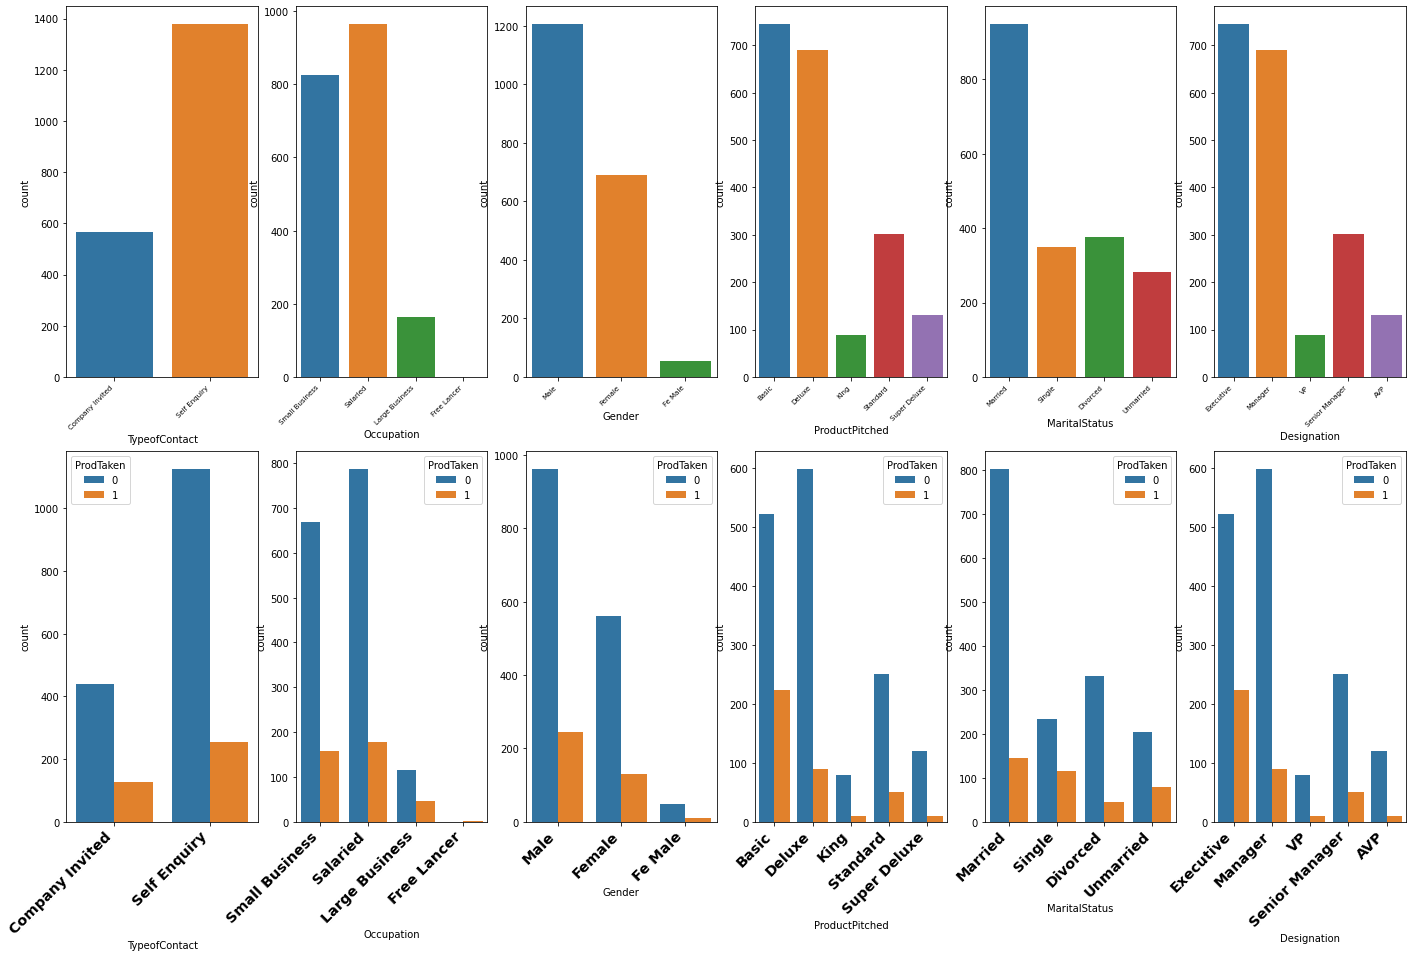

In [89]:
fig, ax = plt.subplots(2, 6, figsize=(24, 15))

for i, col in enumerate(str_cols):
    g = sns.countplot(train[col], ax=ax[0][i])
    g.set_xticklabels(g.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small')
    plt.xlabel(col)
    
for i, col in enumerate(str_cols):
    g = sns.countplot(train[col], hue=train['ProdTaken'], ax=ax[1][i])
    g.set_xticklabels(g.get_xticklabels(),
                      rotation=45,
                      horizontalalignment='right',
                      fontweight='heavy',
                      fontsize='x-large')
    plt.xlabel(col)
    
plt.show()
plt.close()

there are outliers in MonthlyIncome

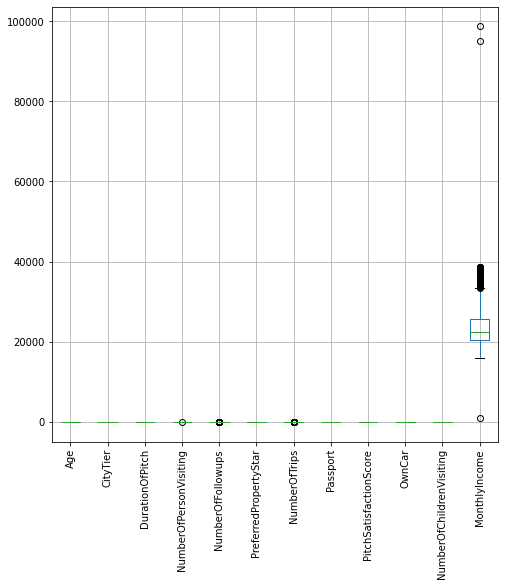

In [91]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
train_x.boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

there are outliers in NumberOfTrips

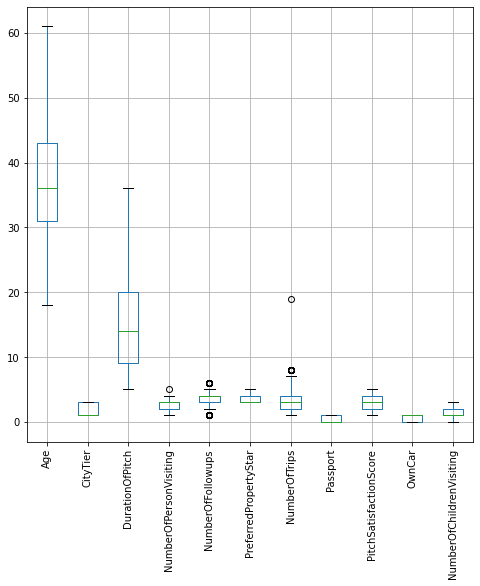

In [92]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
train_x.drop(['MonthlyIncome'], axis=1).boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

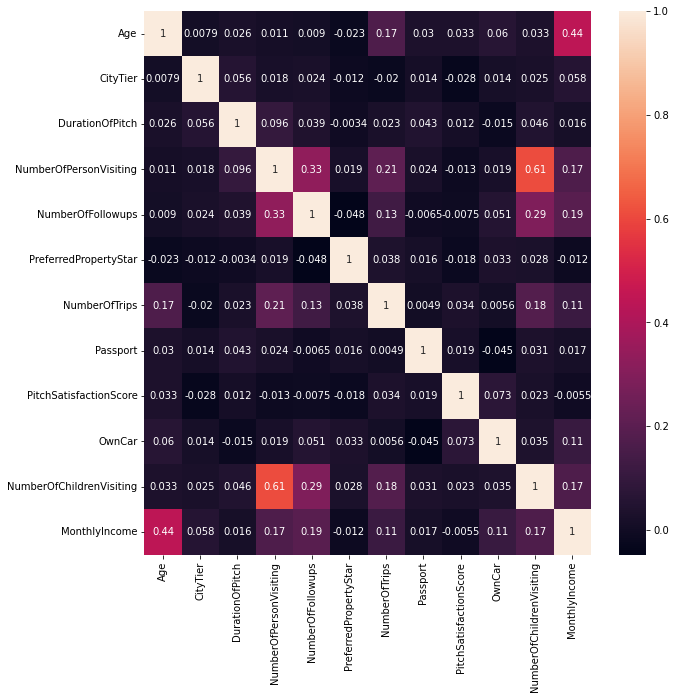

In [93]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(train_x.corr(), annot=True)
plt.show()
plt.close()

### handle outliers

In [111]:
def z_score_outlier(df, col:str):
    z_score_df = pd.DataFrame({'raw_data':df[col], 'z_score':np.abs(ss.zscore(df[col]))})
    return z_score_df

In [130]:
outlier_children_visiting = z_score_outlier(train_x, 'NumberOfChildrenVisiting')
outlier_followups = z_score_outlier(train_x, 'NumberOfFollowups')
outlier_trips = z_score_outlier(train_x, 'NumberOfTrips')


In [133]:
print(len(outlier_followups[outlier_followups['z_score']>2]))
temp = outlier_followups[outlier_followups['z_score']<2]
print(temp['raw_data'].median())
print(temp['raw_data'].mean())
outlier_followups[outlier_followups['z_score']>2]['raw_data'].unique()

121
4.0
3.771537622682661


array([1., 6.])

In [138]:
outlier_followups = outlier_followups.replace({'raw_data':1.0}, 4.0)
outlier_followups = outlier_followups.replace({'raw_data':6.0}, 4.0)
outlier_followups[outlier_followups['raw_data']==6.0]

,raw_data,z_score


In [145]:
print(outlier_trips[outlier_trips['z_score']>2]['raw_data'].max())
outlier_trips[outlier_trips['z_score']>2]['raw_data']

19.0


7       7.0
11      7.0
44      7.0
49      7.0
83      7.0
       ... 
1930    7.0
1933    8.0
1936    7.0
1937    7.0
1952    7.0
Name: raw_data, Length: 132, dtype: float64

In [146]:
train_x = train_x.replace({'NumberOfFollowups':1.0}, 4.0)
train_x = train_x.replace({'NumberOfFollowups':6.0}, 4.0)
train_x = train_x.replace({'NumberOfTrips':19.0}, 8.0)

outliers are handled!!

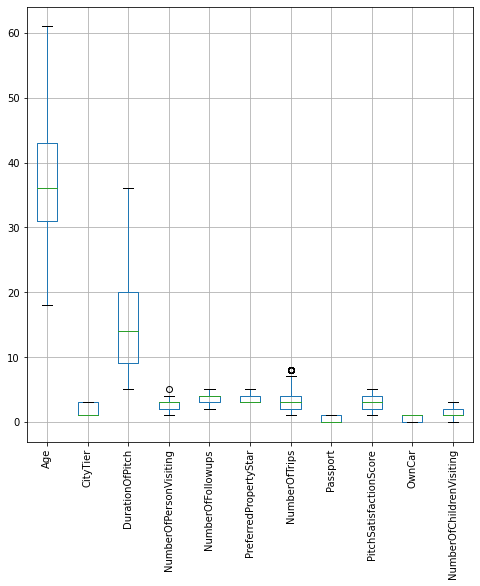

In [147]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
train_x.drop(['MonthlyIncome'], axis=1).boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

## handle missing values using linear regression

In [175]:
def handle_null_lr(df_with_null, to_be_dropped:list, target:str):
    lr = LinearRegression()
    to_be_dropped.remove(target)
    
    df_without_object = df_with_null.select_dtypes(exclude='object')
    temp_df = df_without_object.drop(columns=to_be_dropped)
    df_train = temp_df.dropna()
    df_pred = temp_df.drop(columns=[target])
    
    x = df_train.drop(columns=[target])
    y = df_train[target]
    
    lr.fit(x, y)
    target_pred = lr.predict(df_pred)
    
    return target_pred

In [180]:
pred_list = ['Age', 'DurationOfPitch', 'MonthlyIncome']
age_pred = handle_null_lr(train_x, pred_list, 'Age')
pitch_pred = handle_null_lr(train_x, pred_list, 'DurationOfPitch')
pitch_pred

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [165]:
temp_df = train_x.dropna()
temp_x = temp_df.drop(columns=['Age', 'DurationOfPitch', 'MonthlyIncome'])
temp_x = temp_x.select_dtypes(exclude='object')
temp_y = temp_df['Age']
temp_x

,CityTier,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting
0,1,3,4.0,3.0,3.0,0,1,0,1.0
3,1,3,5.0,4.0,3.0,0,4,0,1.0
4,3,2,3.0,3.0,2.0,0,3,1,0.0
5,1,4,4.0,3.0,3.0,1,5,1,1.0
6,3,3,3.0,3.0,2.0,0,3,1,2.0
...,...,...,...,...,...,...,...,...,...
1950,1,3,5.0,3.0,2.0,0,1,1,2.0
1951,3,3,3.0,5.0,1.0,0,5,1,1.0
1952,3,3,4.0,3.0,7.0,0,2,1,2.0
1953,3,3,5.0,3.0,3.0,0,1,1,2.0


In [166]:
lr = LinearRegression()
lr.fit(X=temp_x, y=temp_y)
age_pred = lr.predict(temp_x)

In [168]:
len(age_pred)

1756